# Chapter 8. Exploratory data analysis
## Notebook for R

### 8.1 Simple exploratory data analysis

In [1]:
library(tidyverse)
library(magrittr)
#url='data/ZA6928_v1-0-0.csv'
url="http://cssbook.net/d/ZA6928_v1-0-0.csv"
d= read_csv2(url, col_names = TRUE)
print("Shape of my original data:")
dim(d)

#Select and rename columns
d2 = d %>%  select (survey, uniqid, p1, tnscntry, d7, d8, d10, d11, d15a, d25, d40a, qd9_4, qd9_1)
d2 = d2 %>% rename (date = p1, country = tnscntry, marital_status = d7, educational = 'd8', gender = d10, age = d11, occupation = d15a, type_community = d25, household_composition = 'd40a', support_refugees = 'qd9_4', support_migrants = 'qd9_1')

print("Shape of my filtered data:")
print(dim(d2))

print("Variables:")
print(names(d2))

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract


Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_character(),
  caseid = col_double(),
  uniqid = col_double(),
  serialid = col_double(),
  p3 = col_double(),
  p6 = col_double(),
  p7 = col_double(),
  p13 = col_double(),
  w1 = col_double(),
  w3 = col_double(),
  w4 = col_double(),
  w5 = col_double(),
  w6 = col_double(),
  w7 = col_double(),
  

[1] "Shape of my original data:"


[1] 33193   705

[1] "Shape of my filtered data:"
[1] 33193    13
[1] "Variables:"
 [1] "survey"                "uniqid"                "date"                 
 [4] "country"               "marital_status"        "educational"          
 [7] "gender"                "age"                   "occupation"           
[10] "type_community"        "household_composition" "support_refugees"     
[13] "support_migrants"     


In [5]:
print("Absolute and relative frequencies of gender:")
d2 %>%
  group_by(gender) %>%
  summarise(frequency = n()) %>%
  mutate(rel_freq = frequency / sum(frequency))
 
print("Absolute and relative frequencies of support_refugees:")
d2 %>%
  group_by(support_refugees) %>%
  summarise(frequency = n()) %>%
  mutate(rel_freq = frequency / sum(frequency))

[1] "Absolute and relative frequencies of gender:"


gender,frequency,rel_freq
Man,15477,0.466273
Woman,17716,0.533727


[1] "Absolute and relative frequencies of support_refugees:"


support_refugees,frequency,rel_freq
DK,1438,0.04332239
Inap. (not 1 in eu28),5138,0.15479167
Tend to agree,12695,0.38246016
Tend to disagree,5391,0.16241376
Totally agree,4957,0.14933872
Totally disagree,3574,0.10767330


In [6]:
#Replace some categories by missing values
d2$support_refugees = na_if(d2$support_refugees, "DK")
d2$support_refugees = na_if(d2$support_refugees, 'Inap. (not 1 in eu28)')

#And count the number of missing values
print("Number of missing values in the variable support_refugees:")
sum(is.na(d2$support_refugees))

#We then can drop the rows containing missing values from our dataset
d2 = d2 %>% drop_na()
print("Shape of my data without missing values")
dim(d2)

[1] "Number of missing values in the variable support_refugees:"


[1] 6576

[1] "Shape of my data without missing values"


[1] 26617    13

In [7]:
print("Crosstab gender and support_refugees:")
d2%>%
  group_by(gender, support_refugees)%>%
  summarise(n=n())%>%
  spread(gender, n)

#Replace age values to correct strings and convert to numeric
d2$age =  recode(d2$age, "15 years" = "15")
d2$age =  recode(d2$age, "98 years" = "98")
d2$age =  recode(d2$age, "99 years (and older)" = "99")
d2$age =  as.numeric(d2$age)

print("Summary statistics for group of cases:")
d2%>%
  group_by(support_refugees, gender)%>%
  summarise(mean_age=mean(age, na.rm = TRUE))%>%
  spread(gender, mean_age)

[1] "Crosstab gender and support_refugees:"


support_refugees,Man,Woman
Tend to agree,5787,6908
Tend to disagree,2411,2980
Totally agree,2456,2501
Totally disagree,1666,1908


[1] "summary statistics for group of cases:"


support_refugees,Man,Woman
Tend to agree,51.88267,52.13781
Tend to disagree,51.24927,51.51611
Totally agree,50.70684,50.40744
Totally disagree,51.01501,52.42610


### 8.2 Visualizing data

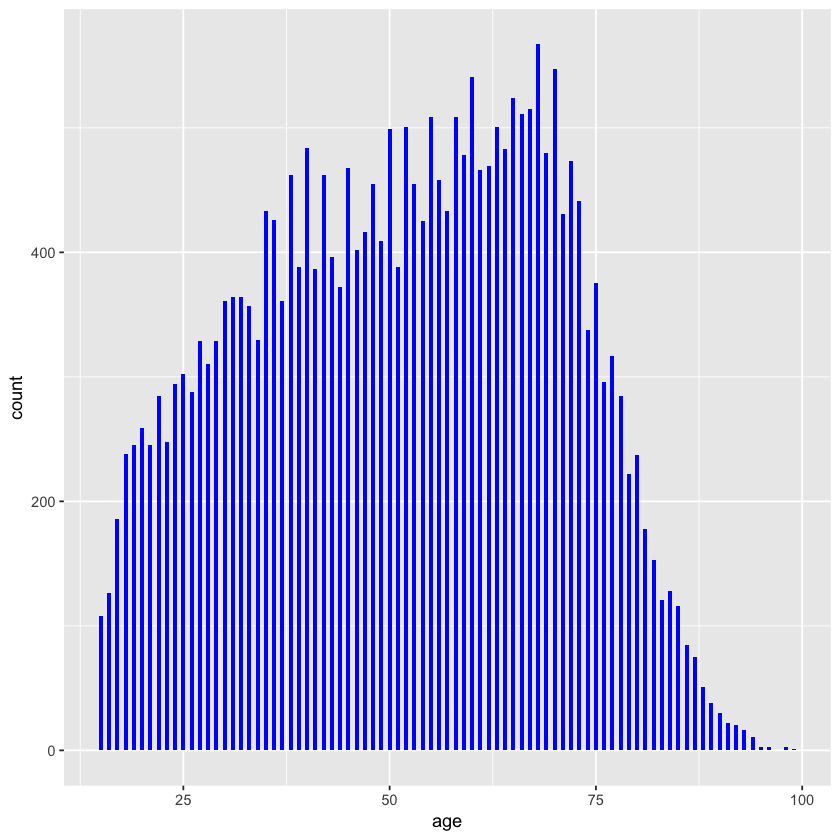

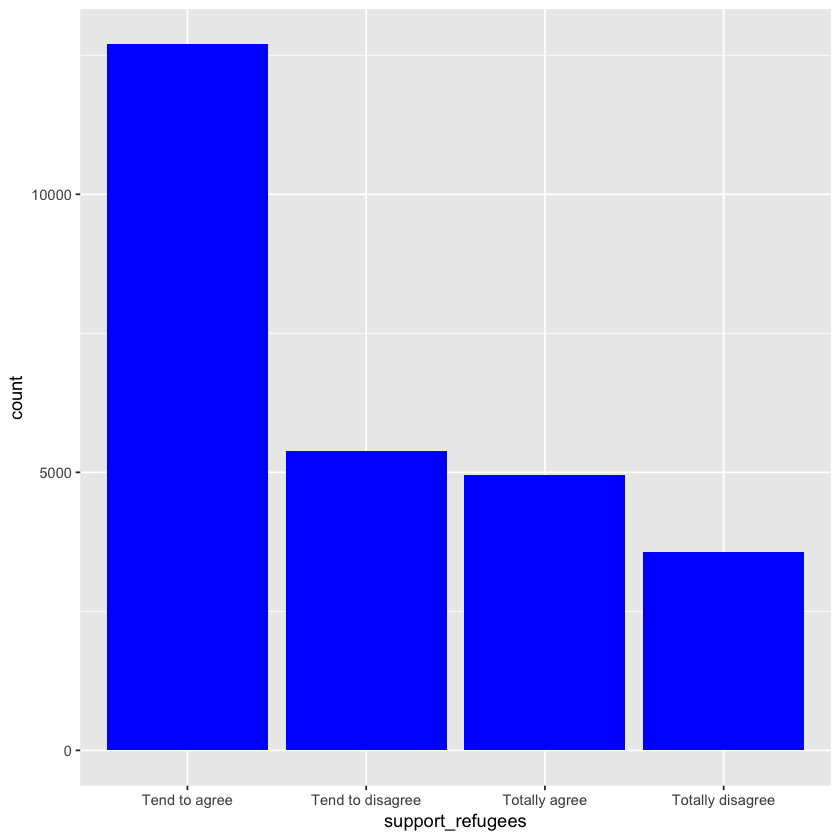

In [10]:
#Histogram of age
ggplot (data=d2) +
  geom_histogram(mapping = aes(x= age), binwidth = 0.5, fill=I("blue"))

#Graph bar of support of refugees
ggplot (data=d2) +
  geom_bar(mapping = aes(x= support_refugees), fill=I("blue"))

Warning message in eval(expr, envir, enclos):
“NAs introducidos por coerción”


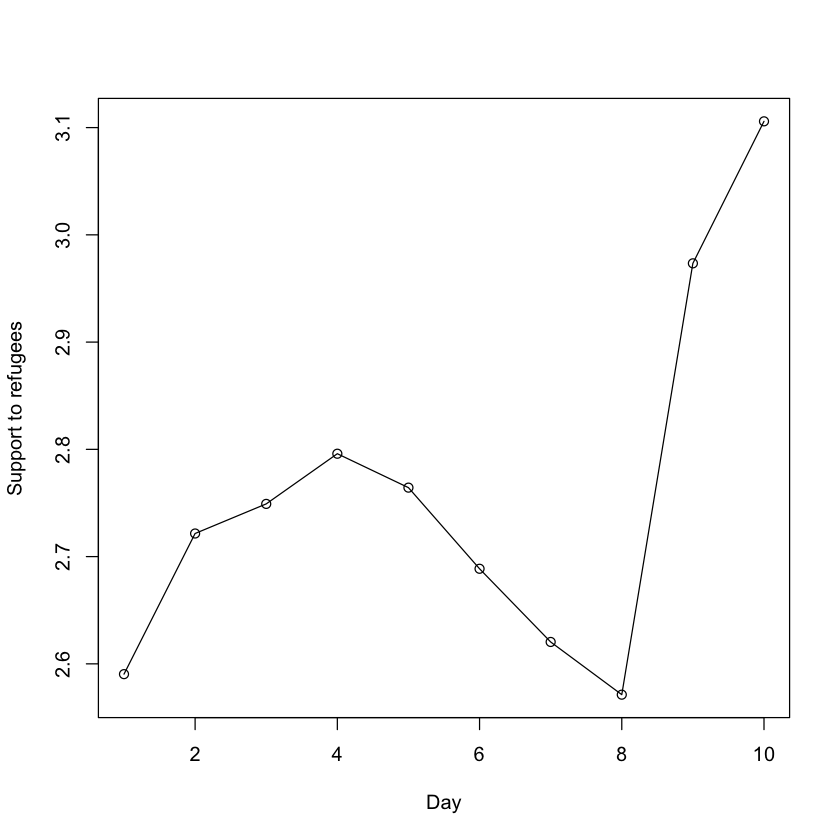

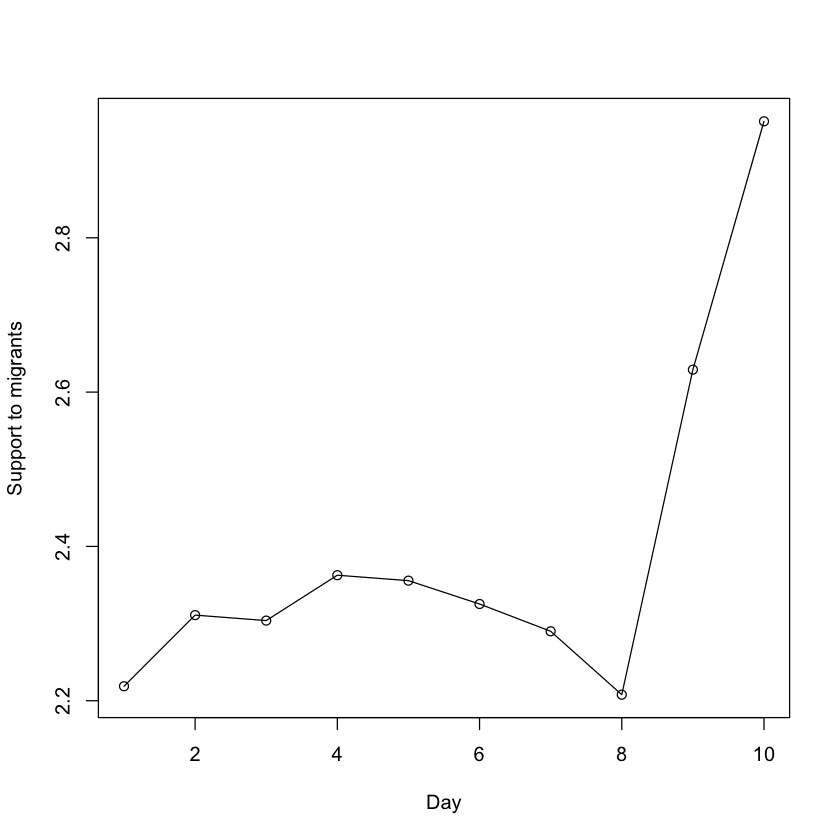

In [11]:
#We transform date, support_refugees and support_migrants into new numerical variables

#Days in order
d2$date_n = d2$date
d2$date_n =  recode(d2$date_n, "Sunday, 5th November 2017" = '1')
d2$date_n =  recode(d2$date_n, "Monday, 6th November 2017" = '2')
d2$date_n =  recode(d2$date_n, "Tuesday, 7th November 2017" = '3')
d2$date_n =  recode(d2$date_n, "Wednesday, 8th November 2017" = '4')
d2$date_n =  recode(d2$date_n, "Thursday, 9th November 2017" = '5')
d2$date_n =  recode(d2$date_n, "Friday, 10th November 2017" = '6')
d2$date_n =  recode(d2$date_n, "Saturday, 11th November 2017" = '7')
d2$date_n =  recode(d2$date_n, "Sunday, 12th November 2017" = '8')
d2$date_n =  recode(d2$date_n, "Monday, 13th November 2017" = '9')
d2$date_n =  recode(d2$date_n, "Tuesday, 14th November 2017" = '10')
d2$date_n =  as.numeric(d2$date_n)

#Level of support to refugees from 1 to 4
d2$support_refugees_n = d2$support_refugees
d2$support_refugees_n =  recode(d2$support_refugees_n, "Totally disagree" = "1")
d2$support_refugees_n =  recode(d2$support_refugees_n, "Tend to disagree" = "2")
d2$support_refugees_n =  recode(d2$support_refugees_n, "Tend to agree" = "3")
d2$support_refugees_n =  recode(d2$support_refugees_n, "Totally agree" = "4")
d2$support_refugees_n =  as.numeric(d2$support_refugees_n)

#Level of support to migrants from 1 to 4
d2$support_migrants_n = d2$support_migrants
d2$support_migrants_n =  recode(d2$support_migrants_n, "Totally disagree" = "1")
d2$support_migrants_n =  recode(d2$support_migrants_n, "Tend to disagree" = "2")
d2$support_migrants_n =  recode(d2$support_migrants_n, "Tend to agree" = "3")
d2$support_migrants_n =  recode(d2$support_migrants_n, "Totally agree" = "4")
d2$support_migrants_n =  as.numeric(d2$support_migrants_n)

#We get the average of support to each group by day
mean_support_refugees_by_day = d2%>%
  group_by(date_n)%>%
  summarise(mean_support_refugees=mean(support_refugees_n, na.rm = TRUE))

mean_support_migrants_by_day = d2%>%
  group_by(date_n)%>%
  summarise(mean_support_migrants=mean(support_migrants_n, na.rm = TRUE))

#print(mean_support_refugees_by_day) 
#print(mean_support_migrants_by_day) 

#We can use line graphs to plot both means as a time series

#Two indepedent figures using base R (function plot)
plot(mean_support_refugees_by_day$mean_support_refugees,type = "o", xlab="Day", ylab="Support to refugees")
plot(mean_support_migrants_by_day$mean_support_migrants,type = "o", xlab="Day", ylab="Support to migrants")

In [ ]:
#Combine the figures using function par()
#par(mfrow=c(1,2)) #An alternative function would be layout()
#plot(mean_support_refugees_by_day$mean_support_refugees,type = "o", xlab="Day", ylab="Support to refugees")
#plot(mean_support_migrants_by_day$mean_support_migrants,type = "o", xlab="Day", ylab="Support to migrants")

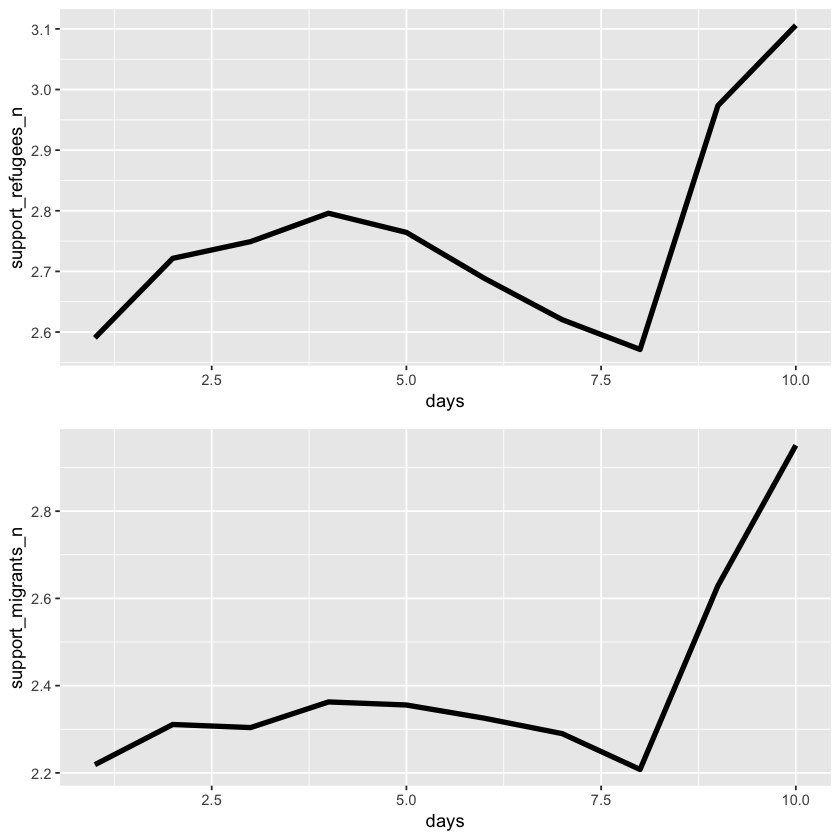

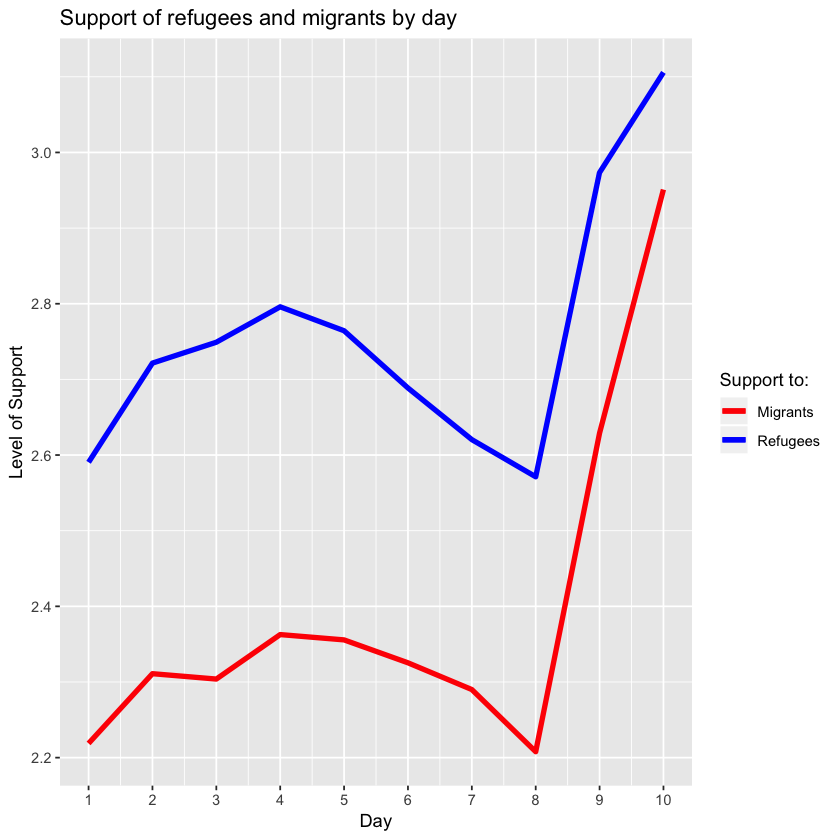

In [18]:
#Plots using ggplot2 (function  geom_line)
#First we need to create a data frame
days <- c(1:10)
supports <- as.data.frame(cbind(mean_support_refugees_by_day$mean_support_refugees,mean_support_migrants_by_day$mean_support_migrants, days))
supports = supports %>% rename (support_refugees_n = V1, support_migrants_n = V2)
                    
g1 = ggplot(supports, aes(x = days)) +
  geom_line(aes(y = support_refugees_n), size = 1.5)
g2 = ggplot(supports, aes(x = days)) +
  geom_line(aes(y = support_migrants_n), size = 1.5)


#Combine ggplot2 graphs using gridExtra
require(gridExtra)
grid.arrange(g1, g2, ncol=1)

#Integrate the two graphs
colors <- c("Refugees" = "blue", "Migrants" = "red")
ggplot(supports, aes(x = days)) +
  geom_line(aes(y = support_refugees_n,color ="Refugees"), size = 1.5) +
  geom_line(aes(y = support_migrants_n,color ="Migrants"), size = 1.5)+
  labs(title = "Support of refugees and migrants by day", x = "Day", y = "Level of Support", color = "Support to:") +
  scale_color_manual(values = colors) +
  scale_x_continuous(breaks = seq(from = 1, to = 10, by = 1))

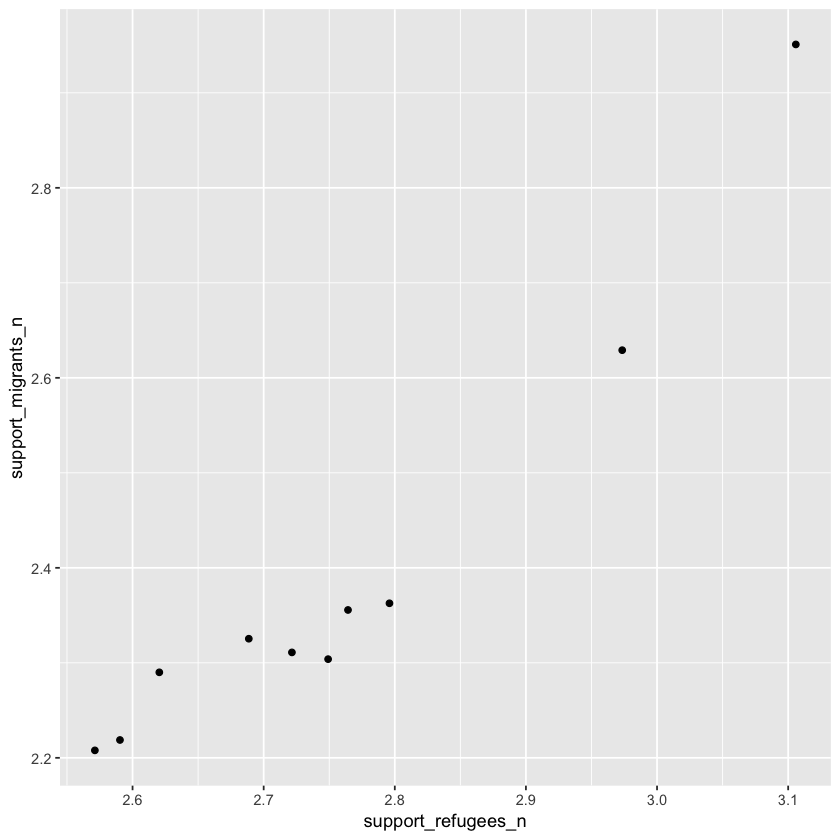

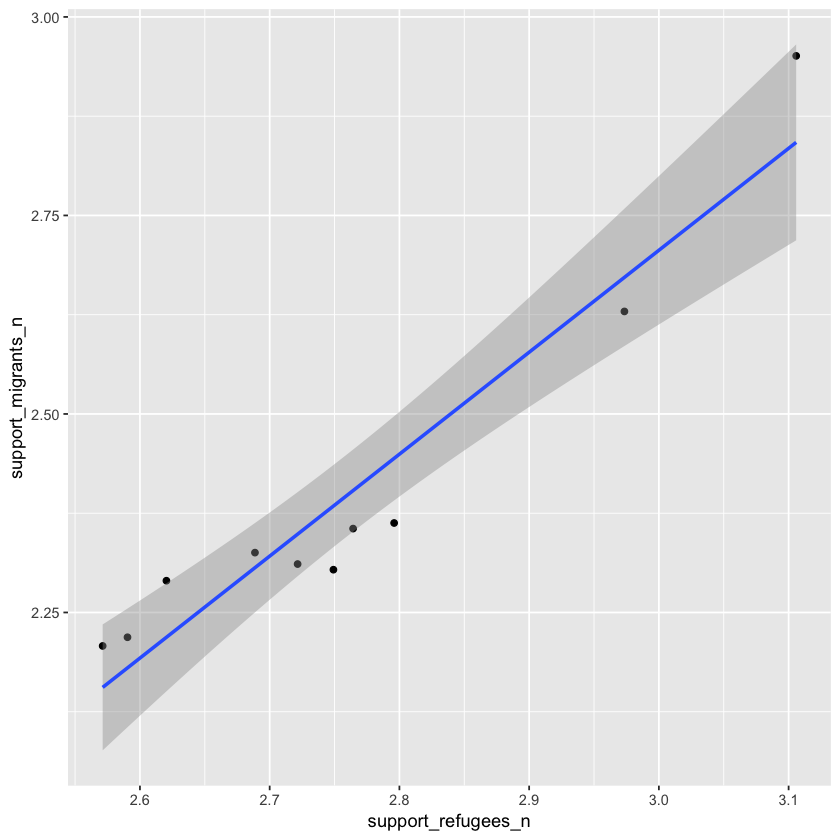

In [20]:
#Scatterplot of avergare support of refugees and migrants by year
ggplot(supports, aes(x=support_refugees_n, y= support_migrants_n))+
  geom_point()

#And aading the regression line
ggplot(supports, aes(x=support_refugees_n, y= support_migrants_n))+
  geom_point()+
  geom_smooth(method = lm)

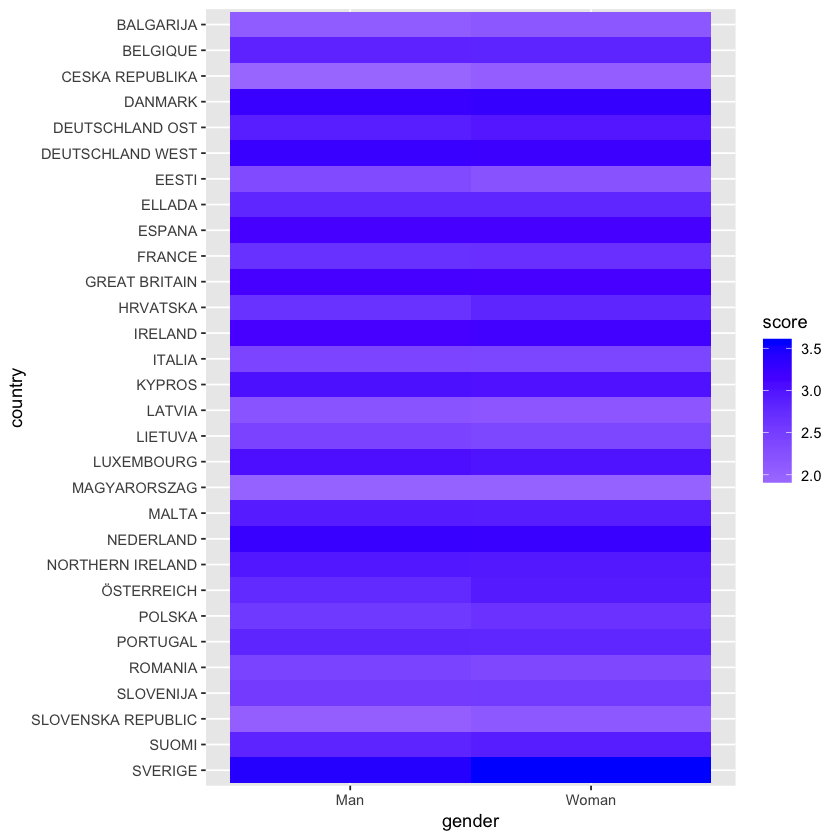

In [21]:
#Heatmap to plot 3 variables: country, gender and support of refugees

#Create a proper dataframe
pivot_data= d2 %>% select (gender, country, support_refugees_n)
pivot_data = pivot_data %>% mutate(country=factor(country,levels=rev(sort(unique(country))))) 
pivot_data= group_by(pivot_data, country, gender) 
pivot_data = summarise(pivot_data, score = mean(support_refugees_n))
#Plot the heatmap
ggplot(pivot_data, aes(x = gender, y = country, fill = score)) + geom_tile()+
  scale_fill_gradient2(low="white", high="blue", guide="colorbar")

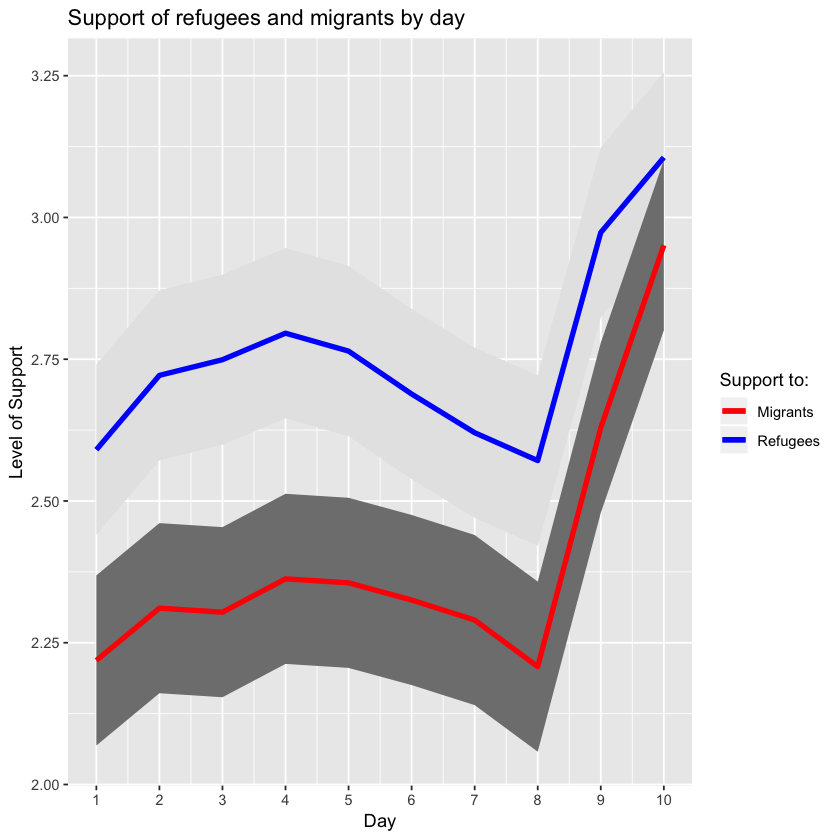

In [22]:
#Add ribbons
colors <- c("Refugees" = "blue", "Migrants" = "red")
ggplot(supports, aes(x = days)) +
  geom_ribbon(aes(ymin = support_refugees_n - 0.15, ymax = support_refugees_n + 0.15), fill = "grey90") +
  geom_line(aes(y = support_refugees_n,color ="Refugees"), size = 1.5) +
  geom_ribbon(aes(ymin = support_migrants_n - 0.15, ymax = support_migrants_n + 0.15), fill = "grey50") +
  geom_line(aes(y = support_migrants_n,color ="Migrants"), size = 1.5)+
  labs(title = "Support of refugees and migrants by day", x = "Day", y = "Level of Support", color = "Support to:") +
  scale_color_manual(values = colors) +
  scale_x_continuous(breaks = seq(from = 1, to = 10, by = 1))

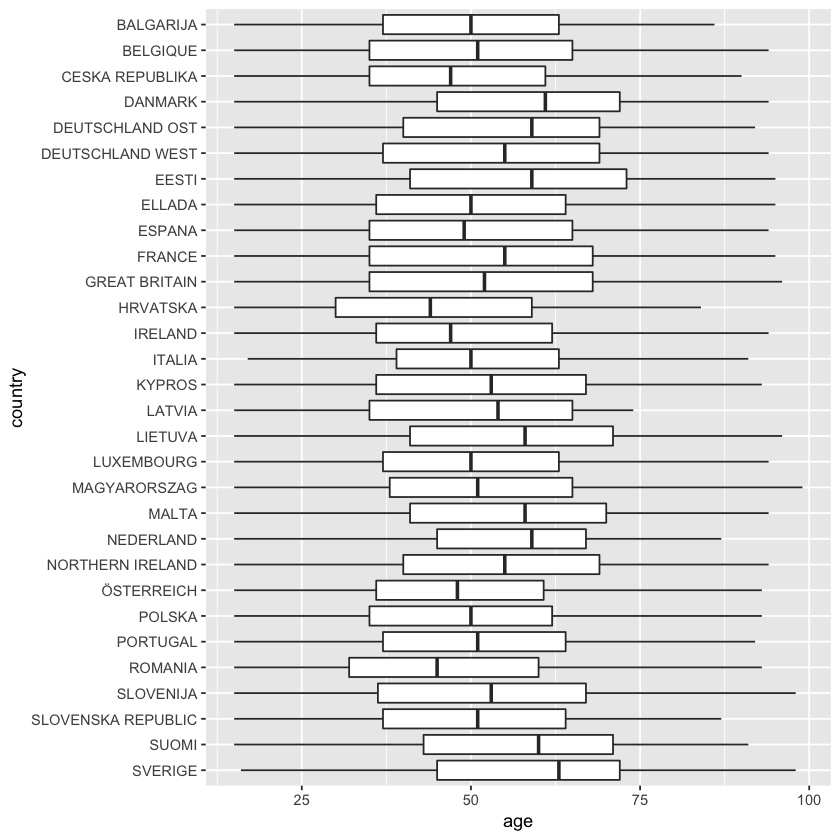

In [23]:
#Get bloxplots of age by country
d2 = d2 %>% mutate(country=factor(country,levels=rev(sort(unique(country))))) #order the countries
ggplot(data = d2, mapping= aes(x=country, y=age))+
  geom_boxplot()+
  coord_flip() #We rotate the graph for a better visualization of country labels


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map


Warning message:
“Column `region` joining factor and character vector, coercing into character vector”


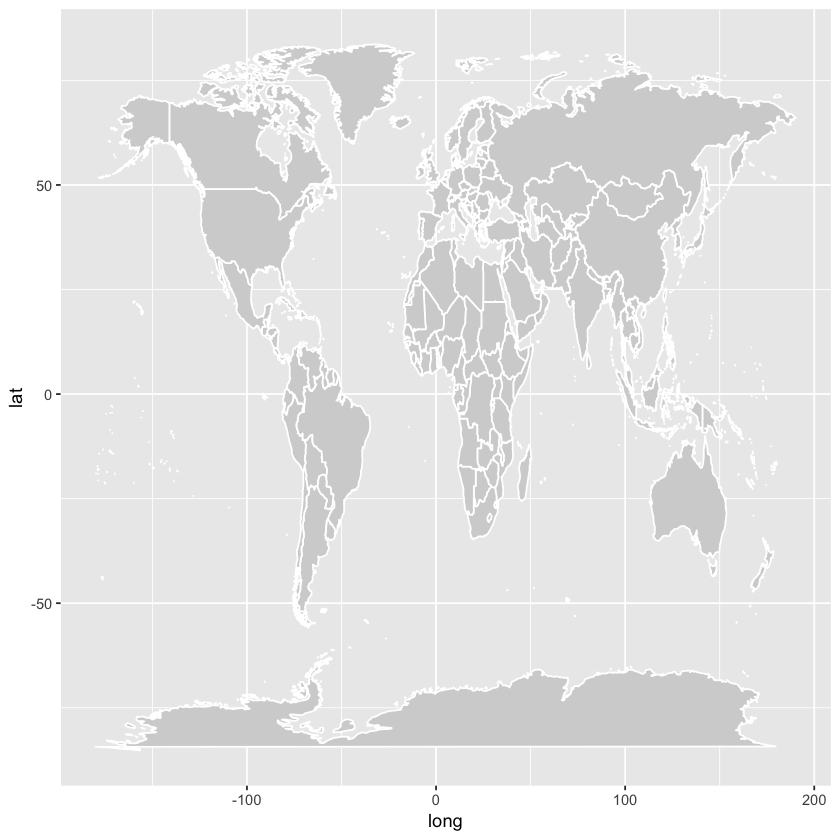

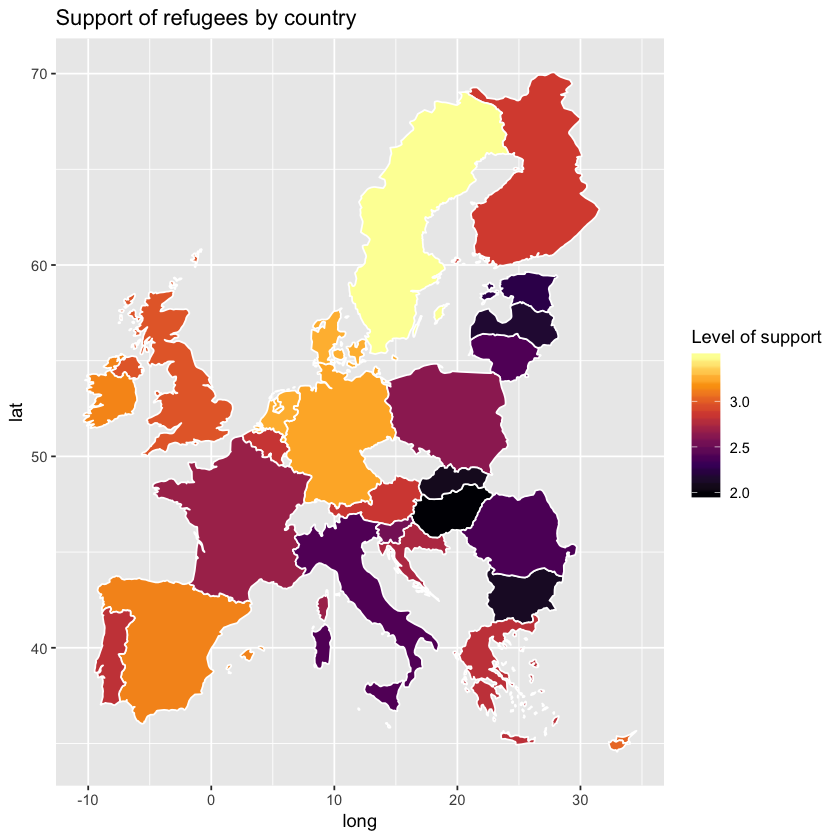

In [24]:
#Plotting geospatial data
#install.packages('maps')
library(maps)

#Generate dataframe with average level of support to refugees by country
mean_support_refugees_by_country = d2%>%
  group_by(country)%>%
  summarise(mean_support_refugees=mean(support_refugees_n, na.rm = TRUE))

supports_country <- as.data.frame(cbind(mean_support_refugees_by_country))

#Recode country names to standard names of the library maps
supports_country$region = supports_country$country
supports_country$region =  recode(supports_country$region, "ÖSTERREICH" = "Austria")
supports_country$region =  recode(supports_country$region, "ITALIA" = "Italy")
supports_country$region =  recode(supports_country$region, "BELGIQUE" = "Belgium")
supports_country$region =  recode(supports_country$region, "PORTUGAL" = "Portugal")
supports_country$region =  recode(supports_country$region, "ESPANA" = "Spain")
supports_country$region =  recode(supports_country$region, "FRANCE" = "France")
supports_country$region =  recode(supports_country$region, "ÖSTERREICH" = "Austria")
supports_country$region =  recode(supports_country$region, "DANMARK" = "Denmark")
supports_country$region =  recode(supports_country$region, "HRVATSKA" = "Croatia")
supports_country$region =  recode(supports_country$region, "DEUTSCHLAND WEST" = "Germany")
supports_country$region =  recode(supports_country$region, "DEUTSCHLAND OST" = "Germany")
supports_country$region =  recode(supports_country$region, "GREAT BRITAIN" = "UK")
supports_country$region =  recode(supports_country$region, "NORTHERN IRELAND" = "UK")
supports_country$region =  recode(supports_country$region, "NEDERLAND" = "Netherlands")
supports_country$region =  recode(supports_country$region, "POLSKA" = "Poland")
supports_country$region =  recode(supports_country$region, "SLOVENIJA" = "Slovenia")
supports_country$region =  recode(supports_country$region, "CESKA REPUBLIKA" = "Czech republic")
supports_country$region =  recode(supports_country$region, "SLOVENSKA REPUBLIC" = "Slovakia")
supports_country$region =  recode(supports_country$region, "MAGYARORSZAG" = "Hungary")
supports_country$region =  recode(supports_country$region, "ELLADA" = "Greece")
supports_country$region =  recode(supports_country$region, "SUOMI" = "Finland")
supports_country$region =  recode(supports_country$region, "IRELAND" = "Ireland")
supports_country$region =  recode(supports_country$region, "LUXEMBOURG" = "Luxemburg")
supports_country$region =  recode(supports_country$region, "SVERIGE" = "Sweden")
supports_country$region =  recode(supports_country$region, "BALGARIJA" = "Bulgaria")
supports_country$region =  recode(supports_country$region, "LATVIA" = "Latvia")
supports_country$region =  recode(supports_country$region, "EESTI" = "Estonia")
supports_country$region =  recode(supports_country$region, "LIETUVA" = "Lithuania")
supports_country$region =  recode(supports_country$region, "MALTA" = "Malta")
supports_country$region =  recode(supports_country$region, "ROMANIA" = "Romania")
supports_country$region =  recode(supports_country$region, "KYPROS" = "Cyprus")

#Load a world map and plot it
world_map <- map_data("world")
ggplot(world_map, aes(x = long, y = lat, group = group)) +
  geom_polygon(fill="lightgray", colour = "white")

#Select EU Contries included in the Eurobarometer
some.eu.countries <- c(
  "Portugal", "Spain", "France", "Germany",
  "Austria", "Belgium", "UK", "Netherlands",
  "Denmark", "Poland", "Italy", 
  "Croatia", "Slovenia", "Hungary", "Slovakia",
  "Czech republic", "Greece", "Finland", "Ireland",
  "Luxemburg", "Sweden", "Sweden", "Bulgaria", "Latvia",
  "Estonia", "Lithuania", "Malta", "Romania", "Cyprus"
)

#Create map data for Europe
some.eu.maps <- map_data("world", region = some.eu.countries)

#Joint my map with Eurobarometer data
support.map <- left_join(supports_country, some.eu.maps, by = "region")

#Plot the support of refugees by country in a Map
ggplot(support.map, aes(long, lat, group = group))+
  geom_polygon(aes(fill = mean_support_refugees), color = "white")+
  scale_fill_viridis_c(option = "B")+
  labs(title = "Support of refugees by country", fill = "Level of support")

### 8.3 Clustering and dimensionality reduction

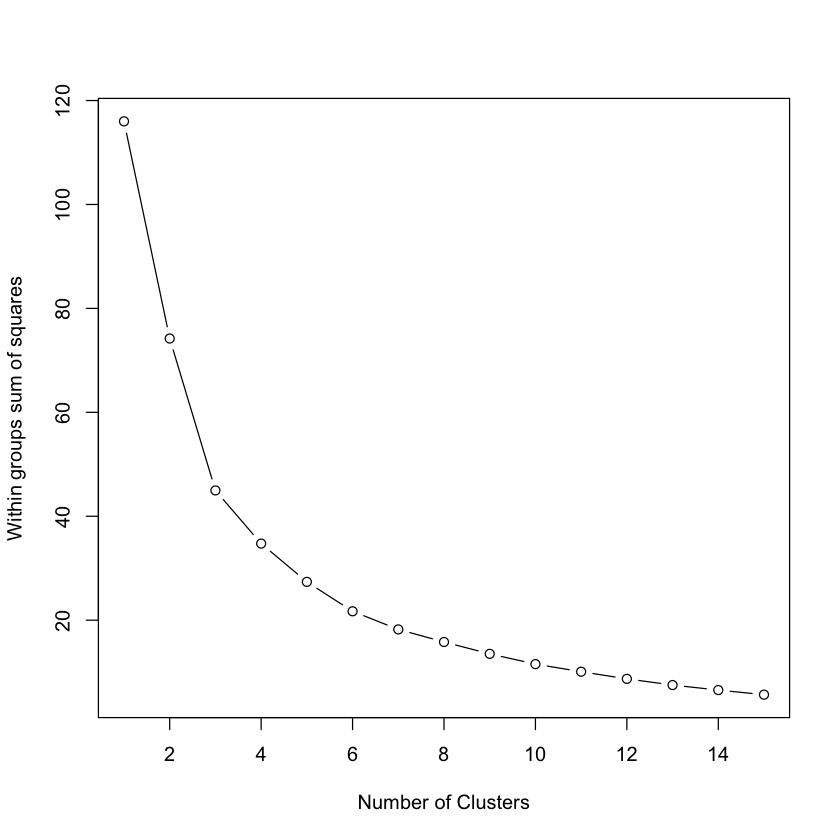

In [27]:
#Prepare data
#transform educational into continuous
d2$educational_n = d2$educational
d2$educational_n = na_if(d2$educational_n, "DK")
d2$educational_n = na_if(d2$educational_n, "Still studying")
d2$educational_n = na_if(d2$educational_n, "No full-time education")
d2$educational_n = na_if(d2$educational_n, "Refusal")
d2$educational_n =  recode(d2$educational_n, "2 years" = "2")
d2$educational_n =  recode(d2$educational_n, "75 years" = "75")
d2$educational_n =  as.numeric(d2$educational_n)

#select variables for matrix
#We get the average of each variable by country
d3 = d2%>%
  group_by(country)%>%
  summarise(mean_support_refugees=mean(support_refugees_n, na.rm = TRUE), 
            mean_support_migrants=mean(support_migrants_n, na.rm = TRUE),
            mean_age=mean(age, na.rm = TRUE),
            mean_educational=mean(educational_n, na.rm = TRUE))
d3 = d3 %>% column_to_rownames(., var = "country")
d3_s = scale(d3) # Scaling the data

# For 1 to 15 cluster centers
wss = 0
for (i in 1:15) {
  km.out <- kmeans(d3_s, centers = i, nstart = 25)
  # Save total within sum of squares to wss variable
  wss[i] <- km.out$tot.withinss
}

# Plot total within sum of squares vs. number of clusters
plot(1:15, wss, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

K-means clustering with 3 clusters of sizes 13, 14, 3

Cluster means:
  mean_support_refugees mean_support_migrants   mean_age mean_educational
1            -0.9321411            -0.8604265 -0.4285480       -0.1702007
2             0.6225176             0.5994666  0.0289195       -0.3872140
3             1.1341958             0.9310040  1.7220835        2.5445348

Clustering vector:
           SVERIGE              SUOMI SLOVENSKA REPUBLIC          SLOVENIJA 
                 3                  3                  1                  1 
           ROMANIA           PORTUGAL             POLSKA         ÖSTERREICH 
                 1                  2                  1                  2 
  NORTHERN IRELAND          NEDERLAND              MALTA       MAGYARORSZAG 
                 2                  2                  2                  1 
        LUXEMBOURG            LIETUVA             LATVIA             KYPROS 
                 2                  1                  1                  2

Loading required package: factoextra

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Too few points to calculate an ellipse



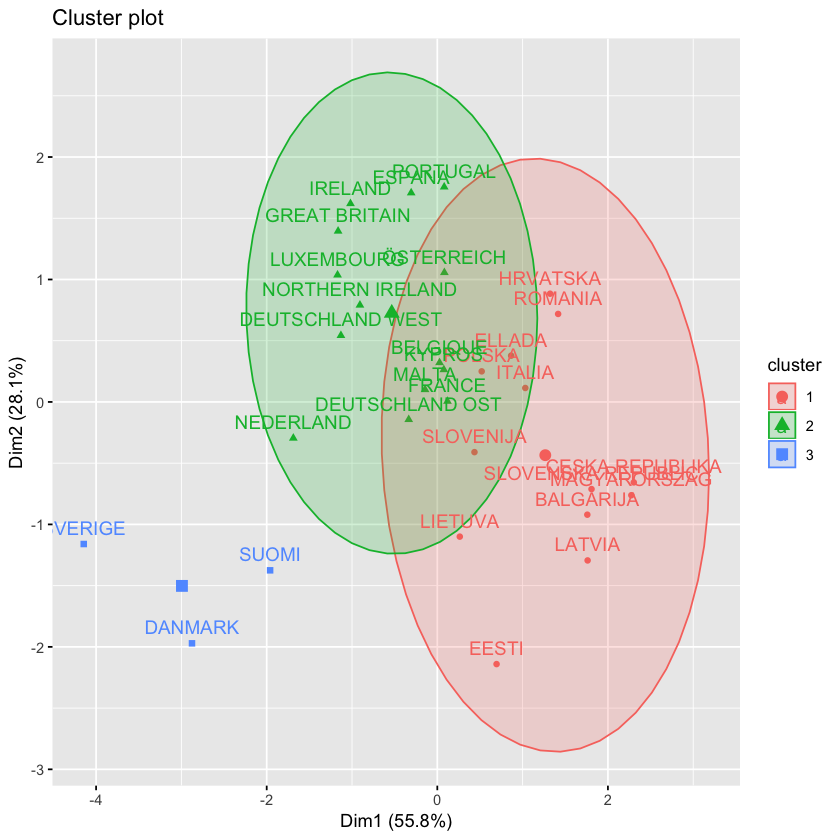

In [29]:
# Compute k-means with k = 3
set.seed(123)
km.res <- kmeans(d3_s, 3, nstart = 25)
print(km.res)

#Visualize with factoextra
require(factoextra)
fviz_cluster(km.res, d3, ellipse.type = "norm")

#fviz_cluster(km.res, d3, palette = "Set2", ggtheme = theme_minimal())


In [ ]:
# PAM clustering
#require(cluster)
#pam.res = pam(d3_s, 3)

            Length Class  Mode     
merge        58    -none- numeric  
height       29    -none- numeric  
order        30    -none- numeric  
labels       30    -none- character
method        1    -none- character
call          3    -none- call     
dist.method   1    -none- character
cluster      30    -none- numeric  
nbclust       1    -none- numeric  
silinfo       3    -none- list     
size          2    -none- numeric  
data        120    -none- numeric  

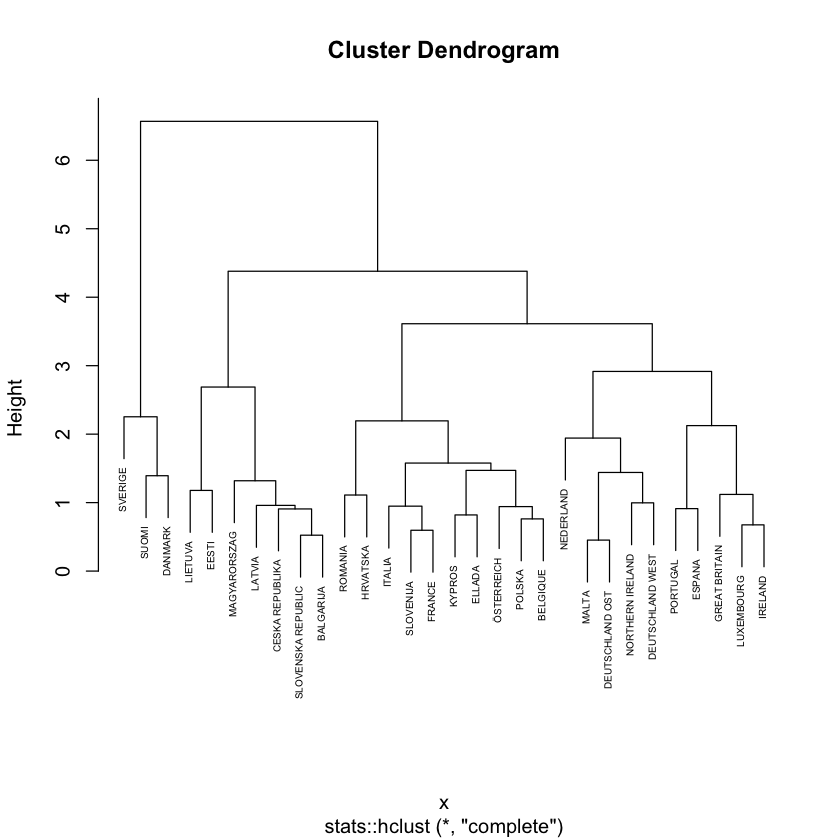

In [33]:
# Hierarchical clustering
hc.res <- hcut(d3_s, hc_method = "complete") #more methods: "average", "single", "centroid"
summary(hc.res)

#Plot the dendogram
plot(hc.res, cex = 0.5)

            Length Class  Mode     
merge        58    -none- numeric  
height       29    -none- numeric  
order        30    -none- numeric  
labels       30    -none- character
method        1    -none- character
call          3    -none- call     
dist.method   1    -none- character
cluster      30    -none- numeric  
nbclust       1    -none- numeric  
silinfo       3    -none- list     
size          3    -none- numeric  
data        120    -none- numeric  

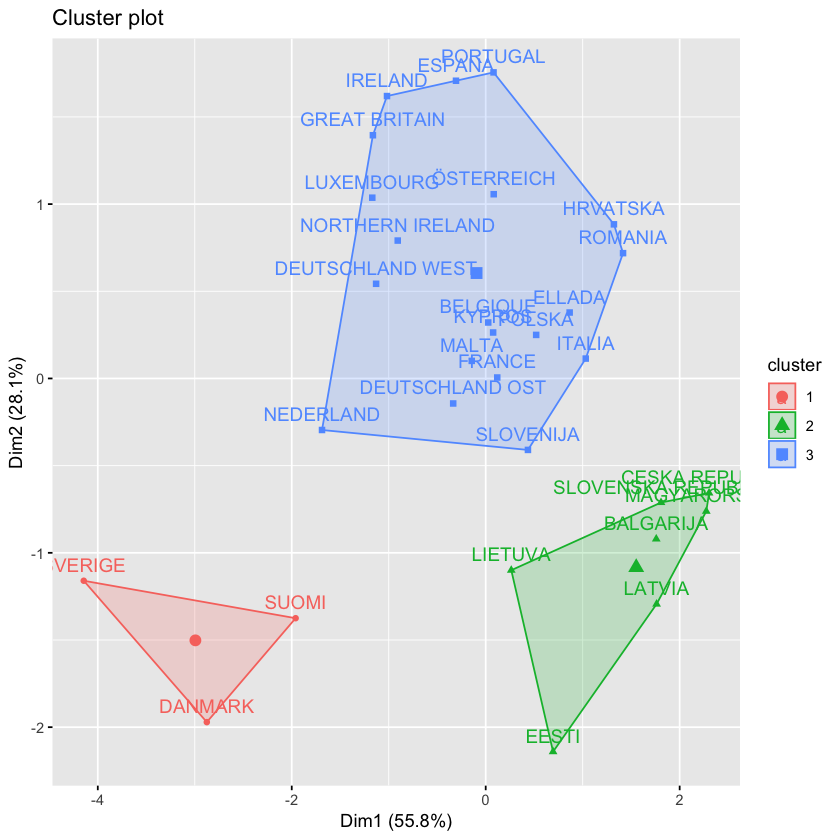

In [34]:
#Re-run the HC with 3 clusters and plot it
hc.res <- hcut(d3_s, k = 3, hc_method = "complete") 
summary(hc.res)

#Visualize the clusters
fviz_cluster(hc.res, d3_s, ellipse.type = "convex")

In [35]:
#PCA
pca = prcomp(d3, scale = TRUE)
head(pca$x)
pca$rotation

,PC1,PC2,PC3,PC4
SVERIGE,-4.1447342,-1.1601369,0.8598708,0.21625557
SUOMI,-1.9599749,-1.3749600,0.3978644,0.43061804
SLOVENSKA REPUBLIC,1.8077959,-0.7115132,0.0345941,0.33334944
SLOVENIJA,0.4356256,-0.4098524,0.1078697,0.08392777
ROMANIA,1.4162641,0.7186880,0.8769610,0.24897014
PORTUGAL,0.0807408,1.7554576,-0.6536528,0.60242195


,PC1,PC2,PC3,PC4
mean_support_refugees,-0.5895525,0.3491545,-0.08308337,-0.723613295
mean_support_migrants,-0.5313495,0.5113499,0.09378793,0.668874258
mean_age,-0.4362546,-0.5488338,-0.69247588,0.170119139
mean_educational,-0.4240017,-0.5615994,0.71047740,-0.007106717


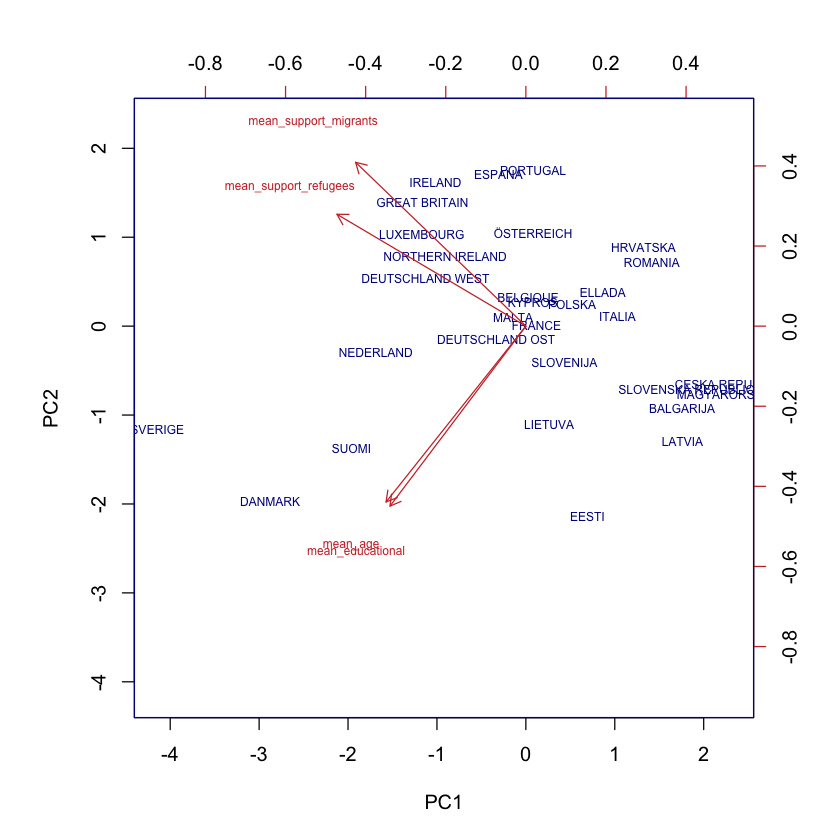

In [36]:
#Plot the PCA
biplot(x = pca, scale = 0, cex = 0.6, col = c("blue4", "brown3"))

[1] "Proportion of variance explained:"


[1] 2.2338334 1.1243734 0.4829420 0.1588512

[1] 0.55845835 0.28109336 0.12073549 0.03971281

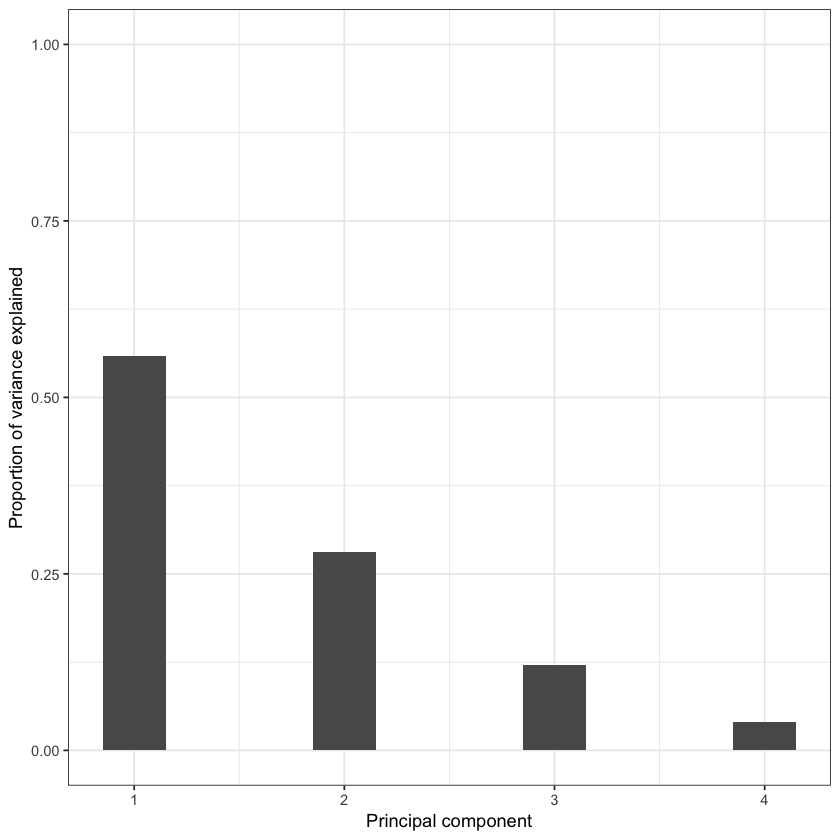

In [47]:
print("Proportion of variance explained:")
pca$sdev^2
prop_variance = pca$sdev^2 / sum(pca$sdev^2)
prop_variance

ggplot(data = data.frame(prop_variance, pc = 1:4),
       aes(x = pc, y = prop_variance)) +
  geom_col(width = 0.3) +
  scale_y_continuous(limits = c(0,1)) +
  theme_bw() +
  labs(x = "Principal component",
       y = "Proportion of variance explained")

[1] "Cumulative explained variance:"


[1] 0.5584583 0.8395517 0.9602872 1.0000000

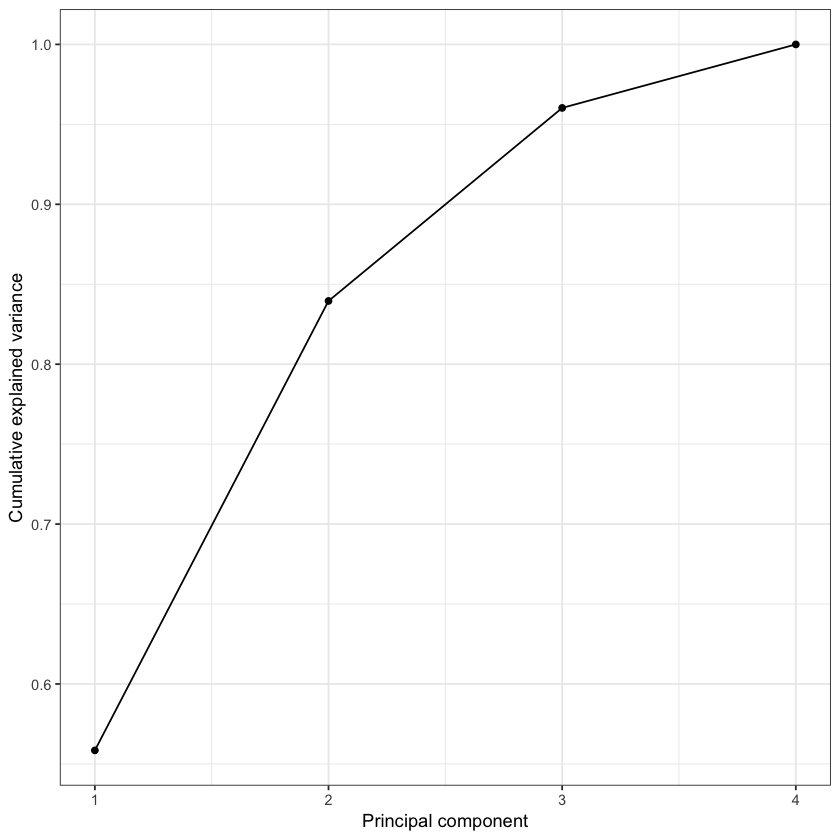

In [48]:
print("Cumulative explained variance:")
prop_acum_variance = cumsum(prop_variance)
prop_acum_variance

ggplot(data = data.frame(prop_acum_variance, pc = 1:4),
       aes(x = pc, y = prop_acum_variance, group = 1)) +
  geom_point() +
  geom_line() +
  theme_bw() +
  labs(x = "Principal component",
       y = "Cumulative explained variance")

,PC1,PC2
SVERIGE,-4.1447342,-1.1601369
SUOMI,-1.9599749,-1.3749600
SLOVENSKA REPUBLIC,1.8077959,-0.7115132
SLOVENIJA,0.4356256,-0.4098524
ROMANIA,1.4162641,0.7186880
PORTUGAL,0.0807408,1.7554576


K-means clustering with 3 clusters of sizes 13, 4, 13

Cluster means:
         PC1       PC2
1  1.2658547 -0.434654
2 -2.6671096 -1.200436
3 -0.4452056  0.804019

Clustering vector:
           SVERIGE              SUOMI SLOVENSKA REPUBLIC          SLOVENIJA 
                 2                  2                  1                  1 
           ROMANIA           PORTUGAL             POLSKA         ÖSTERREICH 
                 1                  3                  1                  3 
  NORTHERN IRELAND          NEDERLAND              MALTA       MAGYARORSZAG 
                 3                  2                  3                  1 
        LUXEMBOURG            LIETUVA             LATVIA             KYPROS 
                 3                  1                  1                  3 
            ITALIA            IRELAND           HRVATSKA      GREAT BRITAIN 
                 1                  3                  1                  3 
            FRANCE             ESPANA           

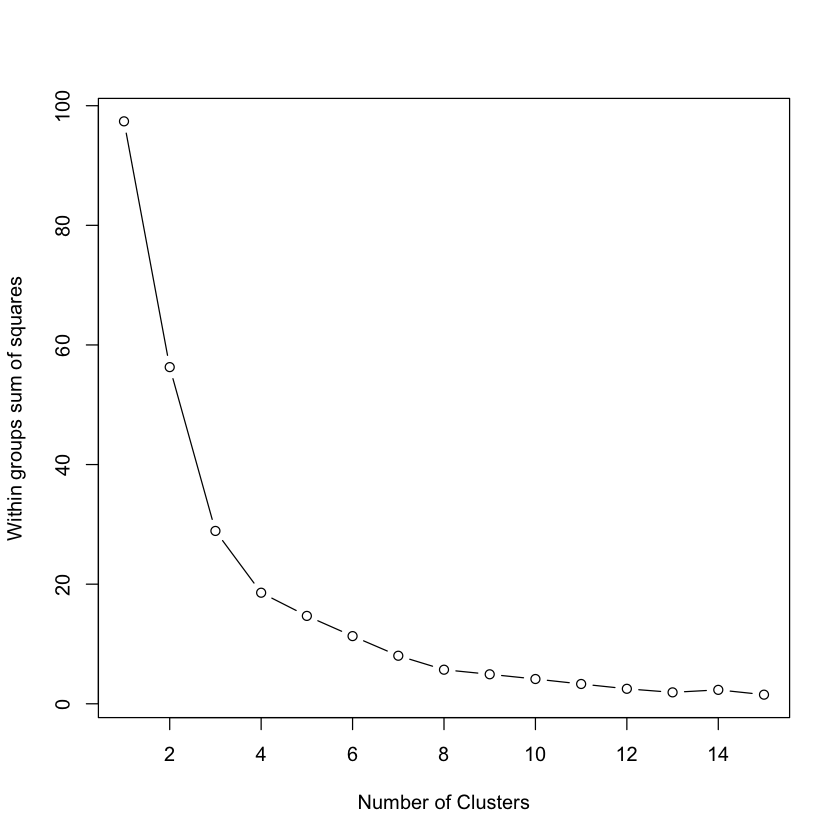

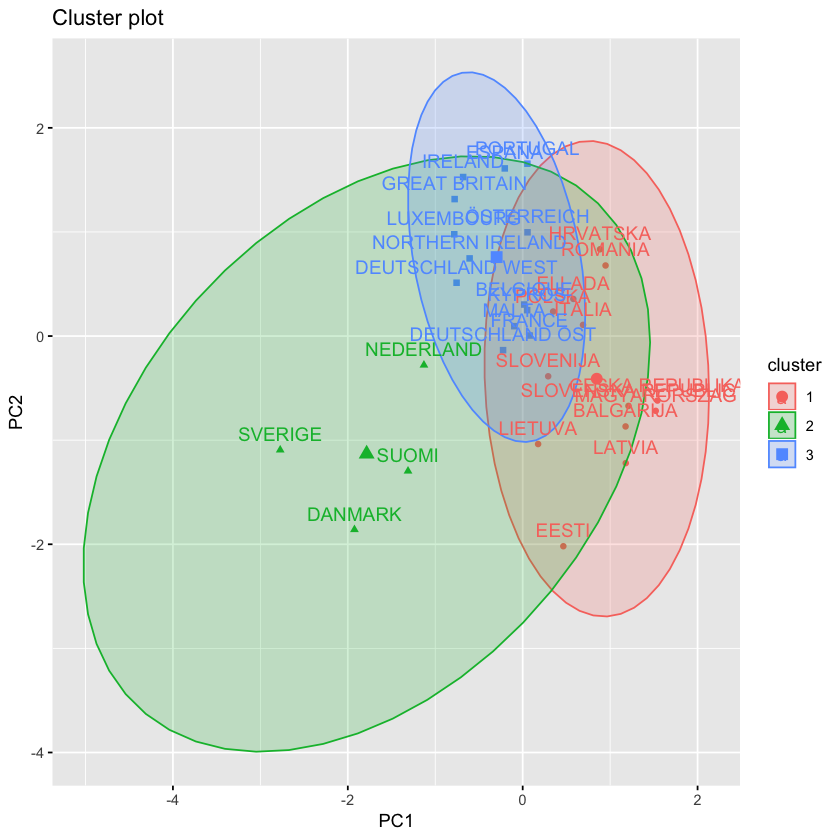

In [50]:
#Generate a new dataset with only two variables (PC1, PC2)
d5 = pca$x
d5 = subset(d5, TRUE, c(PC1, PC2))
head(d5)

#Get optimal number of clusters
wss_5 = 0
for (i in 1:15) {
  km.out_5 <- kmeans(d5, centers = i, nstart = 20)
  wss_5[i] <- km.out_5$tot.withinss }

plot(1:15, wss_5, type = "b", 
     xlab = "Number of Clusters", 
     ylab = "Within groups sum of squares")

# Compute again k-means with k = 3 and visualize the clusters
set.seed(123)
km.res_5 <- kmeans(d5, 3, nstart = 25)
print(km.res_5)
fviz_cluster(km.res_5, d5, ellipse.type = "norm")